<h1>Компютерний практикум №4</h1>
Дисципліна: обробка біомедичних данних<br>Група: БС-83<br> Студент: Дольницький Андрій<br

In [52]:
import pandas as pd
import numpy as np

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [53]:
data=pd.DataFrame(
{
    "randint": np.random.randint(0, 75, size=20),
    "uniform": np.random.uniform(0, 75, size=20),
    "integers":np.random.randint(0,75, size=20),
    "uniform_2": np.random.uniform(0, 75, size=20),
    "normal":np.random.normal(0,75, size=20),
    "gumbel":np.random.gumbel(0,75, size=20)
    
}
)
data

,randint,uniform,integers,uniform_2,normal,gumbel
0,7,58.428460,48,21.449416,-137.321238,33.282988
1,6,56.202733,38,0.546246,17.817096,168.384895
2,45,55.926333,29,1.476926,-48.617185,89.989516
3,55,16.564836,73,60.426207,-72.885462,128.522925
4,11,70.029285,53,16.612262,-107.151857,-0.243513
5,71,57.932236,13,5.078681,177.166113,62.538306
6,58,23.887105,52,20.039724,-93.867318,59.065583
7,63,40.512106,17,68.866213,105.397576,-64.825635
8,40,34.864841,16,40.708023,-122.430670,-14.903586
9,55,3.942816,48,11.047376,12.051116,151.333904


Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку (с. 606): https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [54]:
n = int(data.shape[0])
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def shapir(data_func):
    if n % 2 == 0:
        k = int(n/2)
    else:
        k = int((n-1)/2)
    
    mid = np.mean(data_func)
    med = 0
    
    for i in range(n):
        med = med + (data_func[i] - mid)**2
        
    b = 0
    for i in range (k):
        b += a[i] * (data_func[n-i-1] - data_func[i])
        
    
    return (b**2)/med


    


shapir(data["normal"])

6.316702093083276e-06

Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [55]:
header = ["Variable", "Statistics", "Distribution"]
data_res = pd.DataFrame(columns=header)
data_res

,Variable,Statistics,Distribution


Занести в стовпчик Variable назви змінних.

In [56]:
data_res["Variable"] = data.keys()
data_res

,Variable,Statistics,Distribution
0,randint,NaN,NaN
1,uniform,NaN,NaN
2,integers,NaN,NaN
3,uniform_2,NaN,NaN
4,normal,NaN,NaN
5,gumbel,NaN,NaN


Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [57]:
data_res["Distribution"] = ['normal' if 'norm' in i 
                            else 'non-normal' for i in data_res['Variable']]
data_res

,Variable,Statistics,Distribution
0,randint,NaN,non-normal
1,uniform,NaN,non-normal
2,integers,NaN,non-normal
3,uniform_2,NaN,non-normal
4,normal,NaN,normal
5,gumbel,NaN,non-normal


Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [58]:
newArrSize = data_res.shape[0]

for i in range (newArrSize):
    key = data_res["Variable"][i]
    if 'normal' in key:
        data_res["Statistics"][i] = f'{data[key].mean()} [{data[key].std()}]'

data_res



,Variable,Statistics,Distribution
0,randint,NaN,non-normal
1,uniform,NaN,non-normal
2,integers,NaN,non-normal
3,uniform_2,NaN,non-normal
4,normal,-27.870514767752137 [78.58402112524885],normal
5,gumbel,NaN,non-normal


Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [59]:
for i in range(data_res.shape[0]):
    per=data_res["Variable"][i]
    if 'normal' not in per:
                data_res["Statistics"][i] = \
        f'{data[per].median()} \
        [{data[per].quantile(0.25)}; {data[per].quantile(0.75)}]'
        

            
        
data_res
                                   

,Variable,Statistics,Distribution
0,randint,39.5 [18.5; 55.75],non-normal
1,uniform,43.63533055276632 [24.59915552989323; ...,non-normal
2,integers,43.5 [16.75; 52.25],non-normal
3,uniform_2,33.87775106942014 [14.019414432750775;...,non-normal
4,normal,-27.870514767752137 [78.58402112524885],normal
5,gumbel,51.66446713116393 [16.33839477698606; ...,non-normal


Зберегти таблицю в пдф форматі

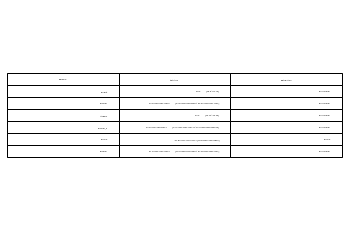

In [60]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

figure = plt.figure()

ax = figure.add_subplot(111)

text = []
for row in range(len(data_res)):
    text.append(data_res.iloc[row])

ax.table(cellText=text, colLabels=data_res.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(figure)
pdf.close()
